In [1]:
import os
import openpnm as op
import pickle

In [2]:
file_name = 'ceramics_500cube_kriging'

In [3]:
with open(file_name, 'rb') as f:
    pn_extacted = pickle.load(f)

## Case 1

In [9]:
hg = op.phases.Mercury(network=pn_extacted)
phys = op.physics.GenericPhysics(network=pn_extacted, phase=hg)
phys.add_model(propname='throat.entry_pressure',
               model=op.models.physics.capillary_pressure.washburn)

Exception: Cannot find a phase associated with phys_01

## Case 2

In [4]:
geom = op.geometry.GenericGeometry(pores=pn_extacted.Ps, throats=pn_extacted.Ts)
geom.update(pn_extacted)
hg = op.phases.Mercury(network=pn_extacted)
phys = op.physics.GenericPhysics(network=pn_extacted, phase=hg, geometry=geom)
phys.add_model(propname='throat.entry_pressure',
               model=op.models.physics.capillary_pressure.washburn)

Exception: Cannot find a phase associated with phys_01

## Case 3

―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
    SOURCE: openpnm.physics.GenericPhysics.__init__ 
    TIME STAMP: 2019-05-24 21:47:36,520    
―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
    SOURCE: openpnm.algorithms.OrdinaryPercolation.set_inlets 
    TIME STAMP: 2019-05-24 21:47:36,537    


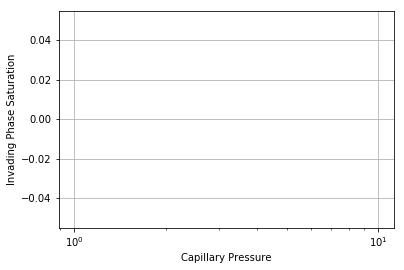

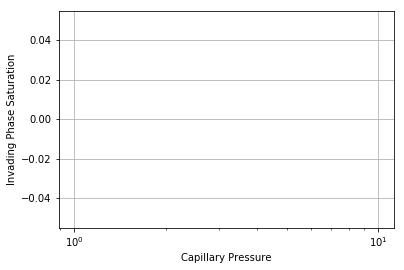

In [8]:
project = op.Project()
pn = op.network.GenericNetwork(project=project)
pn.update(pn_extacted)
# geom = op.geometry.GenericGeometry(pores=pn_extacted.Ps, throats=pn_extacted.Ts)
# geom.update(pn_extacted)
hg = op.phases.Mercury(project=project)
phys = op.physics.GenericPhysics(phase=hg, project=project)
phys.add_model(propname='throat.entry_pressure',
               model=op.models.physics.capillary_pressure.washburn)

mip = op.algorithms.Porosimetry(network=pn, phase=hg, project=project)
mip.set_inlets(pores=pn.pores('left'))
mip.run(points=100)

mip.plot_intrusion_curve()

## Fluid properties

In [ ]:
phys.add_model(propname='???',
               model=op.models.phases.density.???)
phys.add_model(propname='???',
               model=op.models.phases.surface_tension.???)